# 2016.09.28 TZA: BEAR CREDIT SPREAD


In [1]:
import sys
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\options\src')
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\PlotSignal\src')
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\PrintPlot\src')
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\PlotSignal\src')
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\Options\src')
from PlotSignal.Csv_mngt import Csv_mngt
from  PlotSignal.PrintPlot import PrintPlot
from PlotSignal.PrintTrading import PrintTrading
import numpy as np
import mpld3
from datetime import datetime
from matplotlib.dates import  date2num
from Options.Value import Calculate
%matplotlib inline
mpld3.enable_notebook()

## BUY LEG

### ENTRY DATA BUY LEG

In [2]:
option_buy = '20160928 +TZA-161021C27.00'
option_path_buy='E:\\Datos\\bolsa\\cuenta personal\\analisis de valores\\Trades activos\\Scanning\\20160928\\20160928'
option_type = 'call'
strike_buy = 27
expiration = datetime(2016, 10, 21, 16, 0, 0)
premium_buy = 1.19
underlying_buy = 26.885
entry_date_buy = datetime(2016, 9, 28, 9, 51, 13)
trading_day_buy = entry_date_buy.date()
ticker = 'TZA'
historical_volatility_buy = 0.5097

In [3]:
# get data
csv = Csv_mngt()
csv.set_data(option_path_buy + '\\Opciones\\' + option_buy + '.txt',';')
bid_str = csv.extract_data_col('Bid Underlier')
bid_list = np.asarray([float(x.replace(',','.')) for x in bid_str])
ask_str = csv.extract_data_col('Ask Underlier')
ask_list = np.asarray([float(x.replace(',','.')) for x in ask_str])
target_str = csv.extract_data_col('Target')
clean_target_str = []
for each in target_str:
    if each:
        clean_target_str.append(each)
    else:
        clean_target_str.append('0')
target_list = np.asarray([float(x.replace(',','.')) for x in clean_target_str])
time_list = csv.date2num_list(csv.extract_data_col('Time'), '%H:%M:%S')-0.25 
time_list = time_list - int(time_list[0]) + date2num(trading_day_buy)
under_price = (bid_list + ask_list) / 2
premium_bid_str = csv.extract_data_col('Bid')
premium_bid = np.asarray([float(x.replace(',','.')) for x in premium_bid_str])
premium_ask_str = csv.extract_data_col('Ask')
premium_ask = np.asarray([float(x.replace(',','.')) for x in premium_ask_str])
for i,v in enumerate(time_list):
    if date2num(entry_date_buy) <= v:
        break
if not i:
    i=1
ask_price_buy = premium_ask[i-1]
print(ask_price_buy)

1.2


### UNDERLYING BUY LEG

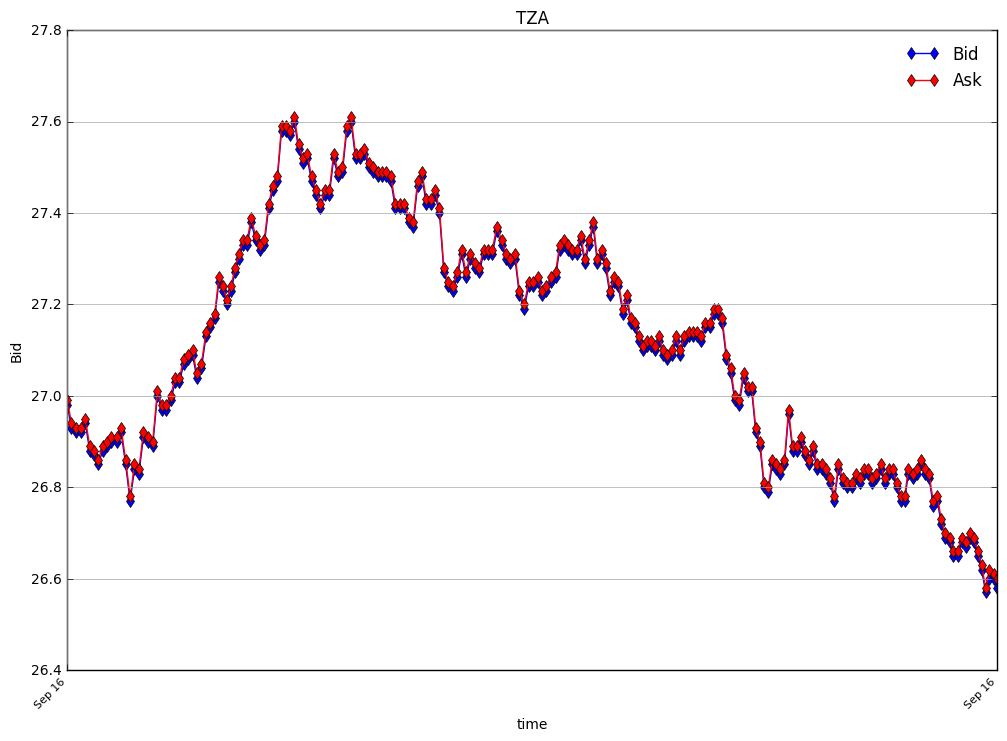

In [4]:

graph = PrintPlot(time_list, bid_list)
graph.init_plot(trace_type = 'bd-', data_name = 'Bid', x_name = 'time', fig_size = (12, 8), title_plot = ticker, log_y = False)
graph.append_trace(ask_list, 'rd-', 'Ask')
graph.show()


### TRADING BUY LEG

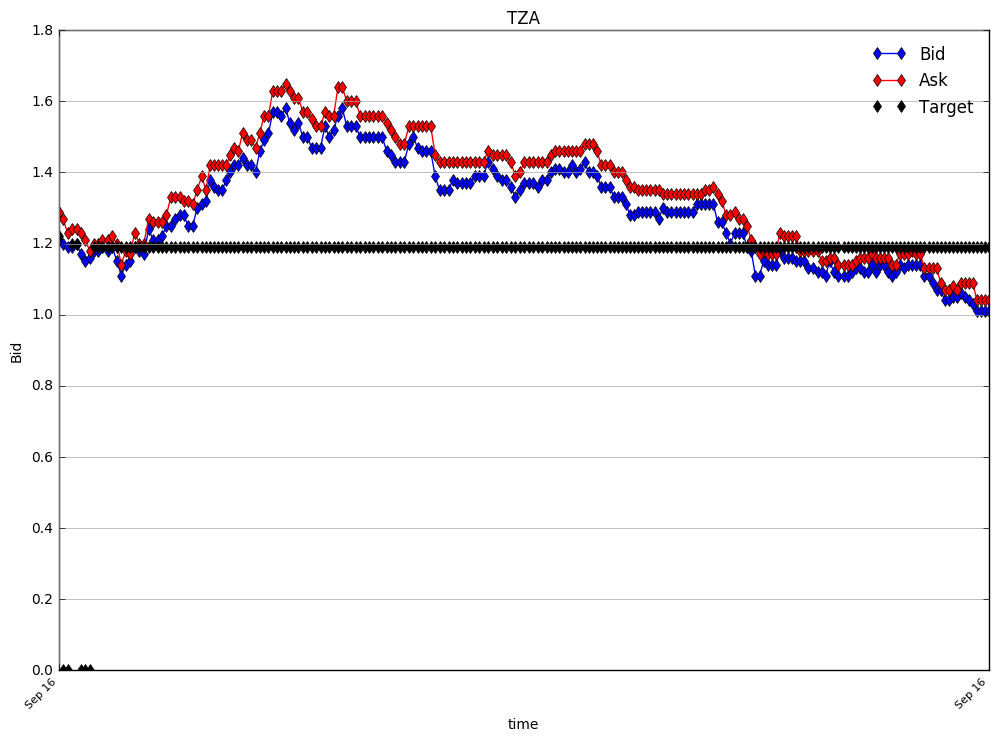

In [5]:
graph_trading_buy = PrintPlot(time_list, premium_bid)
graph_trading_buy.init_plot(trace_type = 'bd-', data_name = 'Bid', x_name = 'time', fig_size = (12, 8), title_plot = ticker, log_y = False)
graph_trading_buy.append_trace(premium_ask, 'rd-', 'Ask')
graph_trading_buy.append_trace(target_list, 'kd', 'Target')
graph_trading_buy.show()

### IMPLIED VOLATILITY BUY LEG

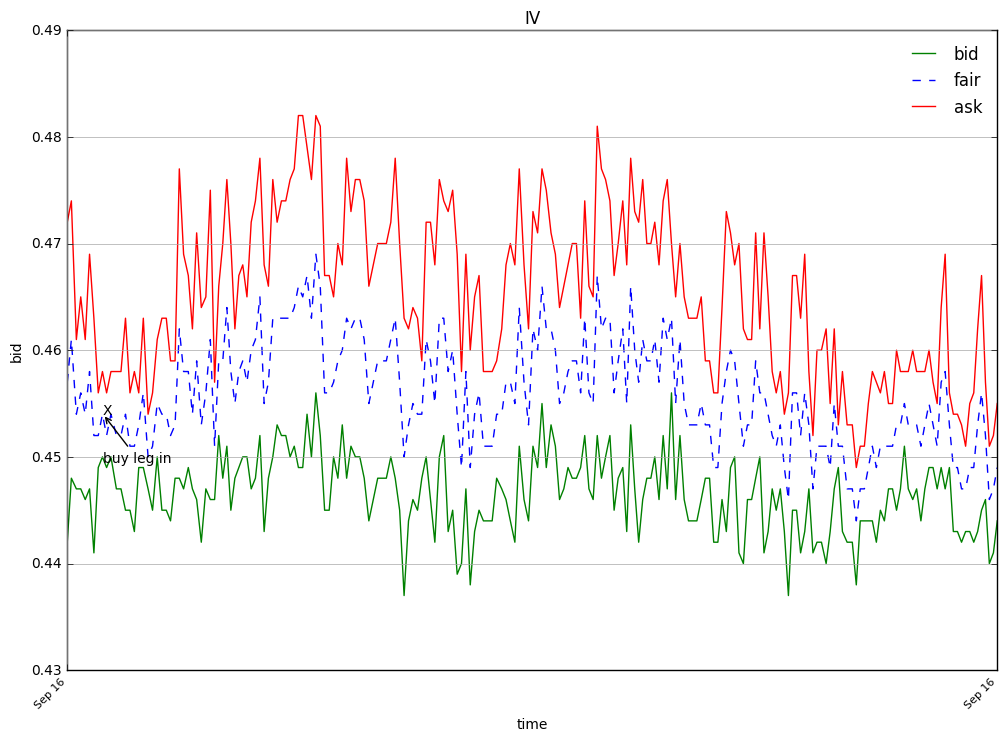

In [6]:
# buy leg implied volatility
graph_IV_buy = PrintTrading()
graph_IV_buy.print_IV(option_type, premium_bid, under_price, strike_buy, time_list, expiration, data_name = 'bid',
                     trace_type = 'g-')
time_leg_IV_in = date2num(entry_date_buy)
time_to_exp = date2num(expiration)-date2num(entry_date_buy)
buy_leg_IV_in = Calculate().find_IV(option_type, premium_buy, underlying_buy, strike_buy, time_to_exp)
xy = (date2num(entry_date_buy), buy_leg_IV_in)
xy_text = (date2num(entry_date_buy), buy_leg_IV_in * 0.99)
graph_IV_buy.annotate('buy leg in', xy, xy_text)
graph_IV_buy.text('X', date2num(entry_date_buy), buy_leg_IV_in)
premium_trade = (premium_bid + premium_ask) / 2
graph_IV_buy.add_IV(option_type, premium_trade, under_price, strike_buy, time_list, expiration, data_name = 'fair',
                     trace_type = 'b--')
graph_IV_buy.add_IV(option_type, premium_ask, under_price, strike_buy, time_list, expiration, data_name = 'ask',
                     trace_type = 'r-')
graph_IV_buy.show()


### IMPLIED VOLATILITY CALCULATED BUY LEG

In [7]:
# Buy_leg, IV
print('IV of buy leg in = ' + str(buy_leg_IV_in))


IV of buy leg in = 0.454


## WRITE LEG

   ### ENTRY DATA WRITE LEG

In [8]:
option_write = '20160928 +TZA-161021C26.00'
option_path_write='E:\\Datos\\bolsa\\cuenta personal\\analisis de valores\\Trades activos\\Scanning\\20160928\\20160928'
strike_write = 26
premium_write = -1.84
underlying_write = 27.19
entry_date_write = datetime(2016, 9, 28, 10, 38, 33)
trading_day_write = entry_date_write.date()
historical_volatility_write = 0.5097

In [9]:
# get data
csv = Csv_mngt()
csv.set_data(option_path_write + '\\Opciones\\' + option_write + '.txt',';')
bid_str = csv.extract_data_col('Bid Underlier')
bid_list = np.asarray([float(x.replace(',','.')) for x in bid_str])
ask_str = csv.extract_data_col('Ask Underlier')
ask_list = np.asarray([float(x.replace(',','.')) for x in ask_str])
target_str = csv.extract_data_col('Target')
clean_target_str = []
for each in target_str:
    if each:
        clean_target_str.append(each)
    else:
        clean_target_str.append('0')
target_list = np.asarray([float(x.replace(',','.')) for x in clean_target_str])
time_list = csv.date2num_list(csv.extract_data_col('Time'), '%H:%M:%S')-0.25
time_list = time_list - int(time_list[0]) + date2num(trading_day_write)
under_price = (bid_list + ask_list) / 2
premium_bid_str = csv.extract_data_col('Bid')
premium_bid = np.asarray([float(x.replace(',','.')) for x in premium_bid_str])
premium_ask_str = csv.extract_data_col('Ask')
premium_ask = np.asarray([float(x.replace(',','.')) for x in premium_ask_str])
for i,v in enumerate(time_list):
    if date2num(entry_date_write) <= v:
        break
if not i:
    i=1
bid_price_write = premium_bid[i-1]
print(bid_price_write)

1.78


### UNDERLYING WRITE LEG

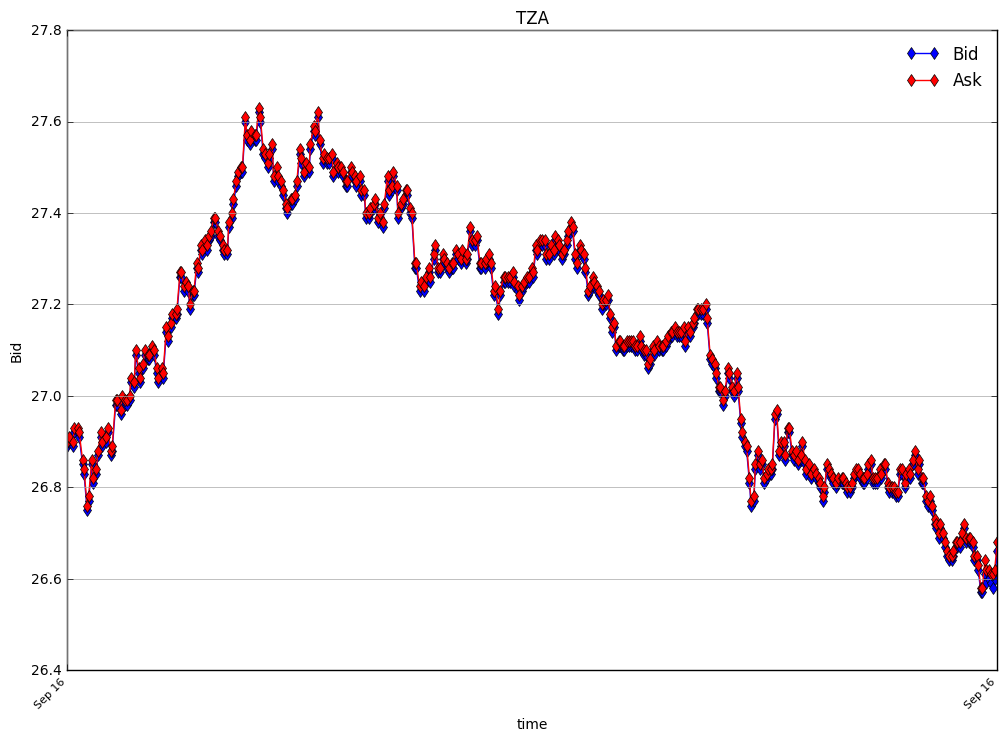

In [10]:
graph = PrintPlot(time_list, bid_list)
graph.init_plot(trace_type = 'bd-', data_name = 'Bid', x_name = 'time', fig_size = (12, 8), title_plot = ticker, log_y = False)
graph.append_trace(ask_list, 'rd-', 'Ask')
graph.show()


### TRADING WRITE LEG

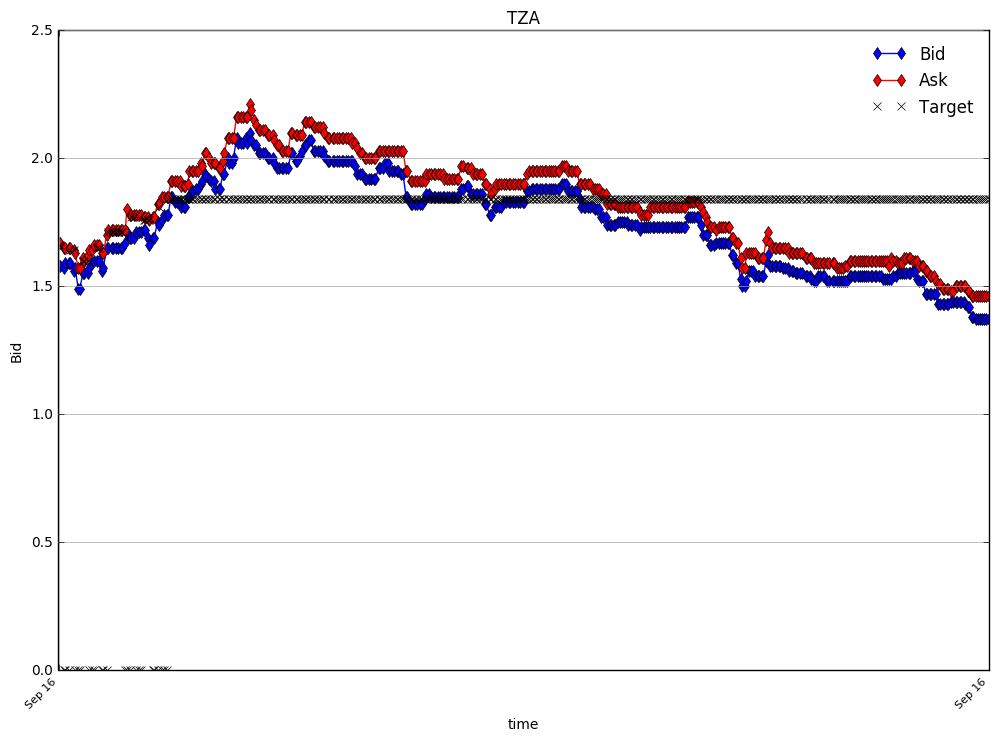

In [11]:
graph_trading_buy = PrintPlot(time_list, premium_bid)
graph_trading_buy.init_plot(trace_type = 'bd-', data_name = 'Bid', x_name = 'time', fig_size = (12, 8), title_plot = ticker, log_y = False)
graph_trading_buy.append_trace(premium_ask, 'rd-', 'Ask')
graph_trading_buy.append_trace(target_list, 'kx', 'Target')
graph_trading_buy.show()

### IMPLIED VOLATILITY WRITE LEG

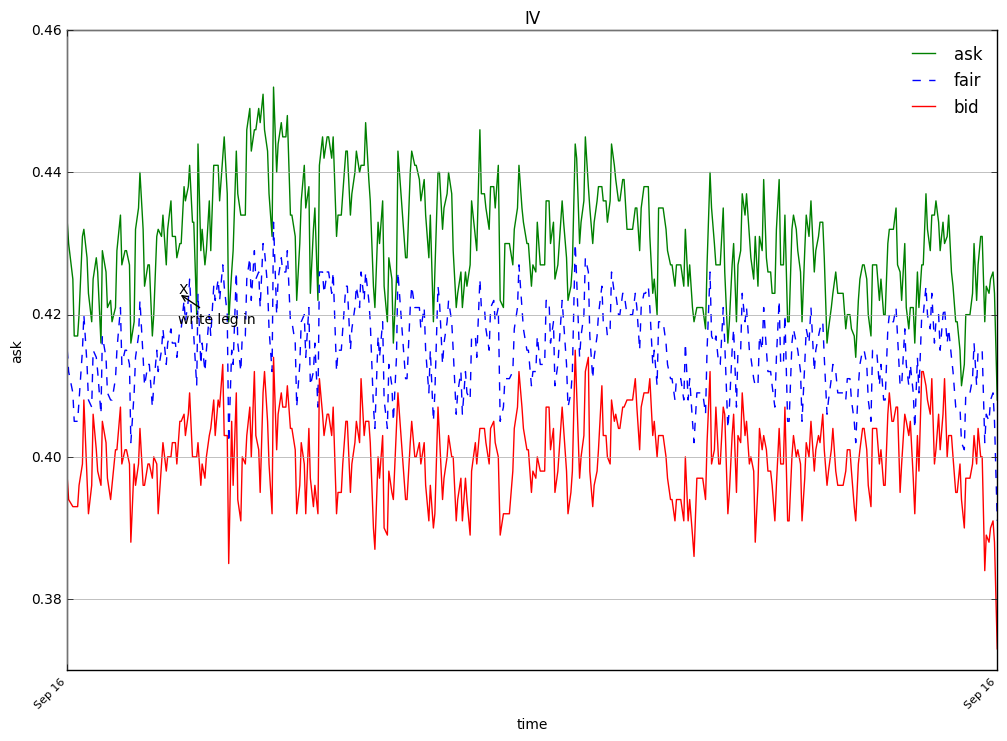

In [12]:
# buy leg implied volatility
graph_IV_write = PrintTrading()
graph_IV_write.print_IV(option_type, premium_ask, under_price, strike_write, time_list, expiration, data_name = 'ask',
                     trace_type = 'g-')
time_leg_IV_in = date2num(entry_date_write)
time_to_exp = date2num(expiration)-date2num(entry_date_write)
write_leg_IV_in = Calculate().find_IV(option_type, -premium_write, underlying_write, strike_write, time_to_exp)
xy = (date2num(entry_date_write), write_leg_IV_in)
xy_text = (date2num(entry_date_write), write_leg_IV_in * 0.99)
graph_IV_write.annotate('write leg in', xy, xy_text)
graph_IV_write.text('X', date2num(entry_date_write), write_leg_IV_in)
premium_trade = (premium_bid + premium_ask) / 2
graph_IV_buy.add_IV(option_type, premium_trade, under_price, strike_write, time_list, expiration, data_name = 'fair',
                     trace_type = 'b--')
graph_IV_buy.add_IV(option_type, premium_bid, under_price, strike_write, time_list, expiration, data_name = 'bid',
                     trace_type = 'r-')
graph_IV_write.show()


### IMPLIED VOLATILITY CALCULATED

In [17]:
# Write_leg, IV
print('IV of write leg in = ' + str(write_leg_IV_in))


IV of write leg in = 0.423


## RESULTS
### TRADING WITH ROBOT

In [14]:
print('IV of buy leg in = ' + str(buy_leg_IV_in) + '    premium buy leg = ' + str(premium_buy))
print('IV of write leg in = ' + str(write_leg_IV_in) + '    premium write leg = ' + str(premium_write))
print('\ndelta premium trading = ' + '{0:.2f}'.format((-premium_write) - premium_buy))

IV of buy leg in = 0.454    premium buy leg = 1.19
IV of write leg in = 0.423    premium write leg = -1.84

delta premium trading = 0.65


### TRADING AT MARKET PRICE

In [15]:
print('\nPremium market buy = ' + '{0:.2f}'.format(ask_price_buy))
print('\nPremium market write = ' + '{0:.2f}'.format(bid_price_write))
print('\ndelta premium trading = ' + '{0:.2f}'.format(bid_price_write - ask_price_buy))


Premium market buy = 1.20

Premium market write = 1.78

delta premium trading = 0.58


### TRADING AT HISTORICAL VOLATILITY

In [16]:
premium_historical_buy = Calculate().value(option_type, underlying_buy, strike_buy, date2num(expiration) - 
                                           date2num(entry_date_buy), historical_volatility_buy, 0.01, 0)
print('\nHistorical volatility buy = ' + str(historical_volatility_buy) +
      '    premium HV buy = ' + '{0:.2f}'.format(premium_historical_buy))
premium_historical_write = Calculate().value(option_type, underlying_write, strike_write, date2num(expiration) - 
                                           date2num(entry_date_write), historical_volatility_write, 0.01, 0)
print('Historical volatility write = ' + str(historical_volatility_write) +
      '    premium HV write = ' + '{0:.2f}'.format(premium_historical_write))
print('\ndelta premium trading = ' + '{0:.2f}'.format(premium_historical_write - premium_historical_buy))


Historical volatility buy = 0.5097    premium HV buy = 1.34
Historical volatility write = 0.5097    premium HV write = 2.06

delta premium trading = 0.72
